# K-Means Clustering

In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from random import sample
import scipy.misc
import matplotlib.cm as cm
from scipy import linalg

In [2]:
datafile = os.getcwd() + '/ex7data2.mat'
mat = scipy.io.loadmat(datafile)
X = mat['X']
#Choose number of centroids to be K=3
K=3
initial_centroids = np.array([[3,3],[6,2], [8,5]])

In [3]:
def plotData(myX, mycentroids, myidxs=None):
    colors = ['b', 'g', 'darkorange', 'salmon', 'olivedrab']
    
    assert myX[0].shape == mycentroids[0][0].shape
    assert mycentroids[-1].shape[0]<=len(colors)
    
    if myidxs is not None:
        assert myidxs.shape[0] == myX.shape[0]
        subX = []
        for x in range(mycentroids[0].shape[0]):
            subX.append(np.array([myX[i] for i in range(myX.shape[0]) if myidxs[i]==x]))
    else:
        subX = [myX]

    fig = plt.figure(figsize=(7,5))
    for x in range(len(subX)):
        newX = subX[x]
    plt.plot(newX[:,0], newX[:,1], 'o', color=colors[x], alpha=0.75, label='Data Points: Cluster %d'%x)
    plt.xlabel('x1', fontsize=14)
    plt.ylabel('x2', fontsize=14)
    plt.title('Plot of X Points', fontsize=16)
    plt.grid(True)
        
    tempx, tempy = [], []
    for mycentroid in mycentroids:
        tempx.append(mycentroid[:,0])
        tempy.append(mycentroid[:,1])
    for x in range(len(tempx[0])):
        plt.plot(tempx, tempy, 'rx--', markersize=8)
    
    leg = plt.legend(loc=4, framealpha=0.5)
        
        

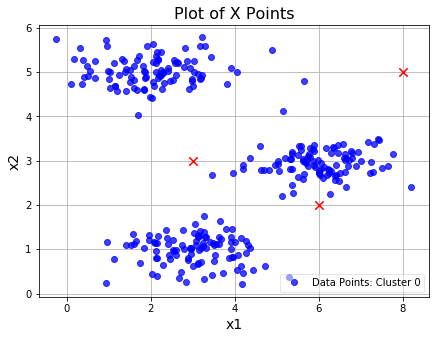

In [4]:
plotData(X, [initial_centroids])

In [5]:
def distSquared(point1, point2):
    assert point1.shape == point2.shape
    return np.sum(np.square(point2-point1))

In [6]:
def findClosestCentroid(myX, mycentroids):
    idxs = np.zeros((myX.shape[0],1))
    # Takes in (m,n) matrix, X
    # m = number of points, n = number of features per point, (K,n) is the centroid seed matrix
    # K = number of centroids (clusters), returns (m,1) vector per point in X
    
    # Loop through each data point in X
    for x in range(idxs.shape[0]):
        mypoint = myX[x]
        mindist, idx = 9999999, 0
        #Compare point to each centroid, keeping track of shortest distance and index of the shortest distance
        for i in range(mycentroids.shape[0]):
            mycentroid = mycentroids[i]
            dist = distSquared(mycentroid, mypoint)
            if dist < mindist:
                mindist = dist
                idx = i
        idxs[x] = idx
    return idxs

In [7]:
idxs = findClosestCentroid(X, initial_centroids)
print (idxs[:3].flatten())

[0. 2. 1.]


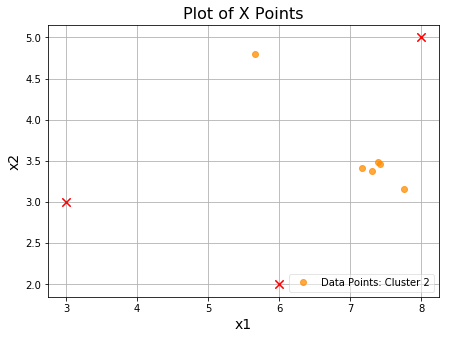

In [8]:
plotData(X, [initial_centroids], idxs)

### Computing Centroid Means

In [9]:
def computeCentroids(myX, myidxs):
    subX = []
    for x in range(len(np.unique(myidxs))):
        subX.append(np.array([myX[i] for i in range(myX.shape[0]) if myidxs[i] == x]))
    return np.array([np.mean(thisX,axis=0) for thisX in subX])

### Implementing K-means on the example dataset

In [10]:
def Kmeans(myX, initial_centroids, K, n_iter):
    centroid_history = []
    current_centroids = initial_centroids
    for i in range(n_iter):
        centroid_history.append(current_centroids)
        idxs = findClosestCentroid(myX, current_centroids)
        current_centroids = computeCentroids(myX, idxs)
    return idxs, centroid_history

In [11]:
idxs, centroid_history = Kmeans(X,initial_centroids,K=3,n_iter=10)

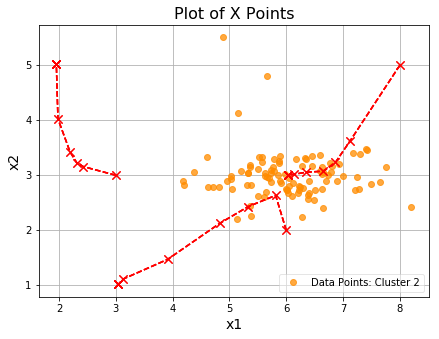

In [12]:
plotData(X, centroid_history, idxs)

### Random Initialization

In [13]:
def chooseKRandomCentroids(myX, K):
    rand_indices = sample(range(0,myX.shape[0]),K)
    return np.array([myX[i] for i in rand_indices])

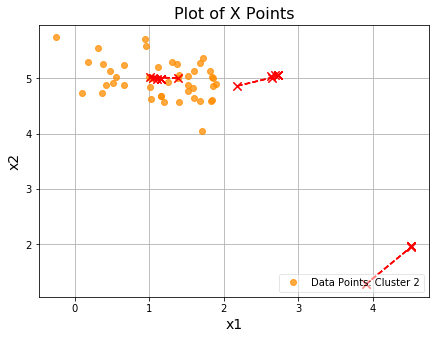

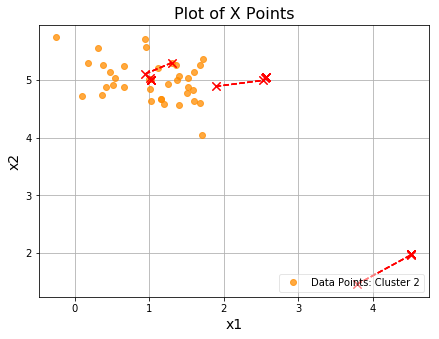

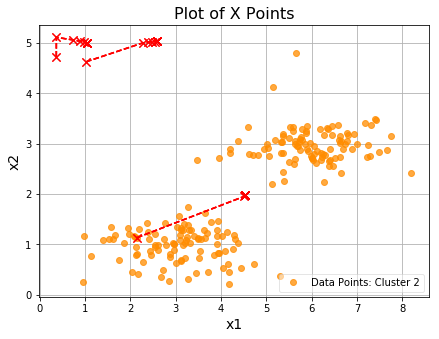

In [14]:
#Now we will randomly initialize our centroids as opposed to a preset like we used before
for x in range(3):
    idxs, centroid_history = Kmeans(X,chooseKRandomCentroids(X,K=3), K=3, n_iter=10)
    plotData(X,centroid_history, idxs)

## Using K-Means for Image Compression

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Shape of A: (128, 128, 3)


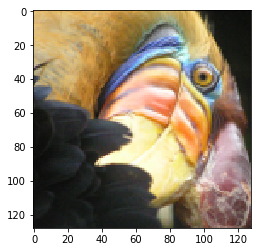

In [15]:
datafile = os.getcwd() + '/bird_small.png'
#Three dimensional matrix, the first two indices identify 1. pixel position 2. red,green & blue
A = scipy.misc.imread(datafile)
print ("Shape of A:", A.shape)
dummy = plt.imshow(A)

In [16]:
#Divide every index in A by 255 so the values are in range of 0 to 1
A = A/255.
#Unroll the image to shape (128*128, 3)
A = A.reshape(-1,3)
myK=16
#Set K=16 to form 16 clusters each corresponding to a color
idxs, centroid_history = Kmeans(A,chooseKRandomCentroids(A,myK),
                                   myK,n_iter=10)

In [17]:
#Assign an index to each pixel
idxs = findClosestCentroid(A, centroid_history[-1])

In [18]:
final_centroids = centroid_history[-1]
#Loop through the original image and form a new image with 16 colors in it
final_image = np.zeros((idxs.shape[0],3))
for x in range(final_image.shape[0]):
    final_image[x] = final_centroids[int(idxs[x])]

Original
Reduced


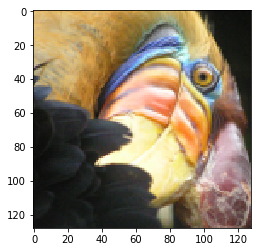

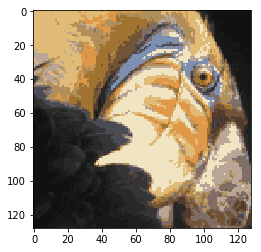

In [19]:
plt.figure()
dummy = plt.imshow(A.reshape(128,128,3))
print("Original")
plt.figure()
print ("Reduced")
dummy = plt.imshow(final_image.reshape(128,128,3))

## Principal Component Analysis

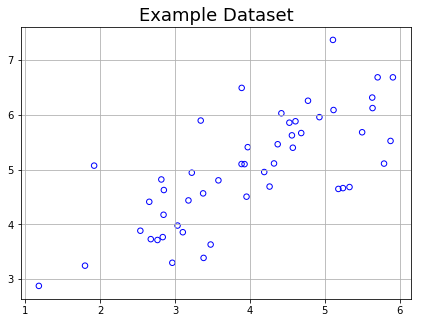

In [20]:
datafile = os.getcwd() + '/ex7data1.mat'
mat = scipy.io.loadmat(datafile)
X = mat['X']

plt.figure(figsize=(7,5))
plot = plt.scatter(X[:,0], X[:,1], s=30, facecolors = 'none', edgecolors='b')
plt.title('Example Dataset', fontsize=18)
plt.grid(True)

In [21]:
def featureNormalize(myX):
    #Normalize features of X, return X
    means = np.mean(myX, axis=0)
    myX_norm = myX-means
    stds = np.std(myX_norm, axis=0)
    myX_norm = myX_norm/stds
    return means, stds, myX_norm

In [22]:
def getUSV(myX_norm):
    #Compute covariance matrix
    cov_matrix = myX_norm.T.dot(myX_norm)/myX_norm.shape[0]
    #Run single value decomposition to get the U principal component matrix
    U, S, V = scipy.linalg.svd(cov_matrix, full_matrices=True, compute_uv = True)
    return U, S, V

In [23]:
means, stds, X_norm = featureNormalize(X)
U, S, V = getUSV(X_norm)

Top principal component is  [-0.70710678 -0.70710678]


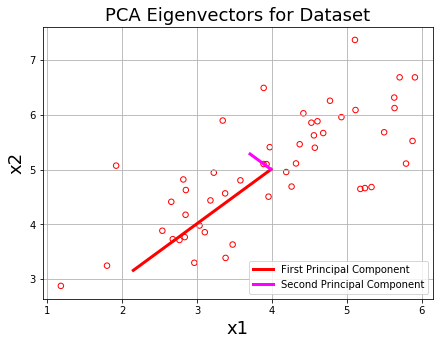

In [24]:
print ('Top principal component is ', U[:,0])

plt.figure(figsize=(7,5))
plot = plt.scatter(X[:,0],X[:,1],s=30,facecolors='none', edgecolors='r')
plt.title('PCA Eigenvectors for Dataset', fontsize=18)
plt.xlabel('x1', fontsize=18)
plt.ylabel('x2', fontsize=18)
plt.grid(True)

plt.plot([means[0], means[0]+1.5*S[0]*U[0,0]],[means[1],means[1]+1.5*S[0]*U[0,1]],
        color='red', linewidth=3, label='First Principal Component')
plt.plot([means[0],means[0]+1.5*S[1]*U[1,0]],
        [means[1],means[1]+1.5*S[1]*U[1,1]],
        color='fuchsia', linewidth=3,label='Second Principal Component')

leg = plt.legend(loc=4)



### Dimensionality Reduction with PCA

In [25]:
def projectData(myX, myU, K):
    Ureduced = myU[:,:K]
    z = myX.dot(Ureduced)
    return z

In [26]:
z = projectData(X_norm, U, 1)
print ('Projection of first example is %0.3f' %float(z[0]))

Projection of first example is 1.496


In [27]:
def recoverData(myZ, myU, K):
    Ureduced = myU[:,:K]
    Xapprox = myZ.dot(Ureduced.T)
    return Xapprox

In [28]:
X_rec = recoverData(z, U, 1)

### Visualizing the Projections

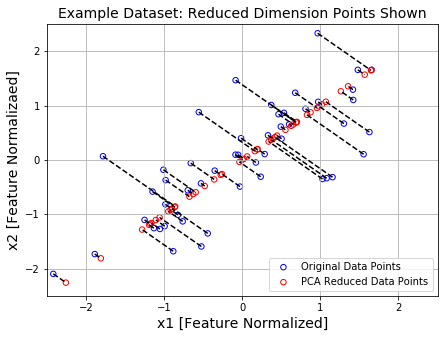

In [29]:
plt.figure(figsize=(7,5))
plot = plt.scatter(X_norm[:,0], X_norm[:,1],s=30, facecolors='none',edgecolors='b',
    label='Original Data Points')
plot = plt.scatter(X_rec[:,0], X_rec[:,1], s=30, facecolors='none', edgecolors='r',
        label='PCA Reduced Data Points')

plt.title('Example Dataset: Reduced Dimension Points Shown', fontsize=14)
plt.xlabel('x1 [Feature Normalized]', fontsize=14)
plt.ylabel('x2 [Feature Normalizaed]', fontsize=14)
plt.grid(True)

for x in range(X_norm.shape[0]):
    plt.plot([X_norm[x,0],X_rec[x,0]],[X_norm[x,1],X_rec[x,1]], 'k--')
    
leg = plt.legend(loc=4)

dummy = plt.xlim((-2.5,2.5))
dummy = plt.ylim((-2.5, 2.5))

##### FACE IMAGE DATASET

In [30]:
datafile = os.getcwd()+ '/ex7faces.mat'
mat = scipy.io.loadmat(datafile)
X = mat['X']

In [62]:
from scipy.misc import imshow
import matplotlib.image as mpimg
import PIL
def getImg(row):
    width, height = 32,32
    square = row.reshape(width, height)
    return square.T
def displayData(myX,mynrows = 10, myncols = 10):
    width, height = 32, 32
    nrows, ncols = mynrows, myncols
    big_picture = np.zeros((height*nrows, width*ncols))
    
    irow, icol = 0,0 
    for i in range(nrows*ncols):
        if icol == ncols:
            irow +=1
            icol = 0
            iimg = getImg(myX[i])
            big_picture[irow*height:irow*height+iimg.shape[0],icol*width:icol*width+iimg.shape[1]] = iimg
            icol+=1
    fig = plt.figure(figsize=(10,10))
    scipy.misc.imsave('faces.jpg', big_picture)
    img = mpimg.imread('faces.jpg')
    plt.imshow(img,cmap = plt.cm.binary, filternorm=10)

In [63]:
means, stds, X_norm = featureNormalize(X)
U, S, V = getUSV(X_norm)

In [64]:
##PCA on the face data set should yield lower resolution photos

In [65]:
#Dimensionality Reduction
z = projectData(X_norm, U, K=36)
X_rec = recoverData(z,U,K=36)

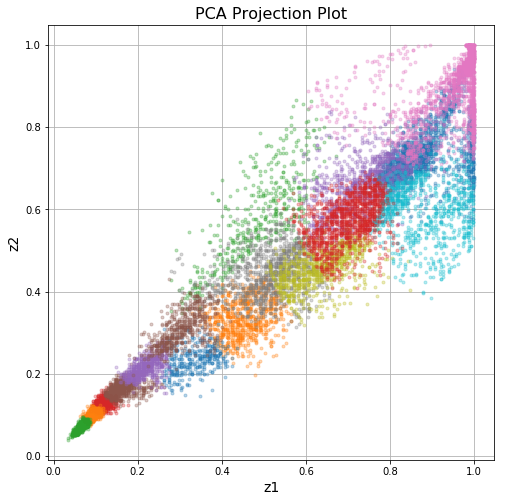

In [72]:
#Display the 16 color clusters from before in 2D, visualization of 2D from 3D
means, stds, A_norm = featureNormalize(A)
#Run SVD
U, S, V = getUSV(A_norm)
#Use PCA to go from 3D to 2D
z = projectData(A_norm, U, 2)
#Make 2-D plot
subX = []
for x in range(len(np.unique(idxs))):
    subX.append(np.array([A[i] for i in range(A.shape[0]) if idxs[i] == x]))
    
fig = plt.figure(figsize=(8,8))
for x in range(len(subX)):
    newX = subX[x]
    plt.plot(newX[:,0],newX[:,1],'.',alpha=0.3)
plt.xlabel('z1', fontsize=14)
plt.ylabel('z2', fontsize=14)
plt.title('PCA Projection Plot', fontsize=16)
plt.grid(True)